In [1]:
import pandas as pd

file_path = './data/imputed_data.csv'
data = pd.read_csv(file_path)
data.head()

,Name,Position,College,Round,Pick,Stat URL,Height,Weight,40 Yard Dash,Bench Press,...,rec_td,rush_att,rush_yds,rush_yds_per_att,rush_td,scrim_att,scrim_yds,scrim_yds_per_att,scrim_td,Year
0,Emmanuel Acho,OLB,Texas,6,204,https://www.sports-reference.com/cfb/players/e...,74.0,238.0,4.64,24.00,...,5.29,199.20,1282.58,8.83,14.91,239.71,1747.91,8.22,20.20,2012
1,Joe Adams,WR,Arkansas,4,104,https://www.sports-reference.com/cfb/players/j...,71.0,179.0,4.51,14.59,...,8.50,4.00,69.50,11.65,0.00,96.00,1393.50,14.45,8.50,2012
2,Chas Alecxih,DT,Pittsburgh,0,0,https://www.sports-reference.com/cfb/players/c...,76.0,296.0,5.31,19.00,...,0.00,1.19,5.20,-0.68,0.36,1.36,5.55,0.86,0.36,2012
3,Frank Alexander,DE,Oklahoma,4,103,https://www.sports-reference.com/cfb/players/f...,76.0,270.0,4.80,24.48,...,2.17,22.98,75.37,4.12,4.24,36.81,231.59,6.49,6.41,2012
4,Antonio Allen,S,South Carolina,7,242,https://www.sports-reference.com/cfb/players/a...,73.0,210.0,4.58,17.00,...,1.68,374.69,2061.25,4.94,19.21,420.39,2397.36,6.43,20.89,2012


In [2]:
data.columns

Index(['Name', 'Position', 'College', 'Round', 'Pick', 'Stat URL', 'Height',
       'Weight', '40 Yard Dash', 'Bench Press', 'Vertical Jump', 'Broad Jump',
       '3 Cone Drill', 'Shuttle', 'conf_abbr', 'games', 'seasons',
       'tackles_solo', 'tackles_assists', 'tackles_total', 'tackles_loss',
       'sacks', 'def_int', 'def_int_yds', 'def_int_td', 'pass_defended',
       'fumbles_rec', 'fumbles_rec_yds', 'fumbles_rec_td', 'fumbles_forced',
       'rec', 'rec_yds', 'rec_yds_per_rec', 'rec_td', 'rush_att', 'rush_yds',
       'rush_yds_per_att', 'rush_td', 'scrim_att', 'scrim_yds',
       'scrim_yds_per_att', 'scrim_td', 'Year'],
      dtype='object')

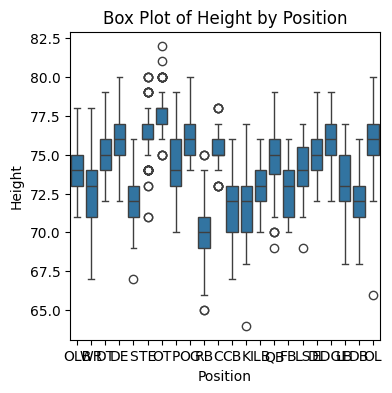

Number of outliers for Height by Position: 67


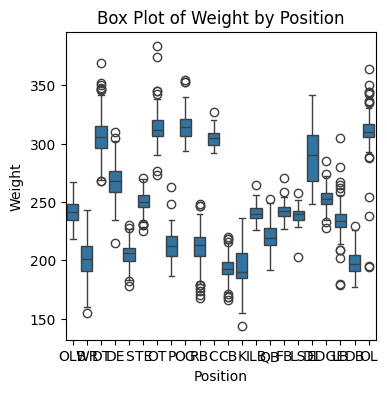

Number of outliers for Weight by Position: 91


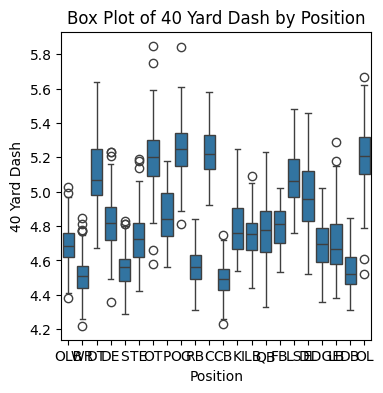

Number of outliers for 40 Yard Dash by Position: 33


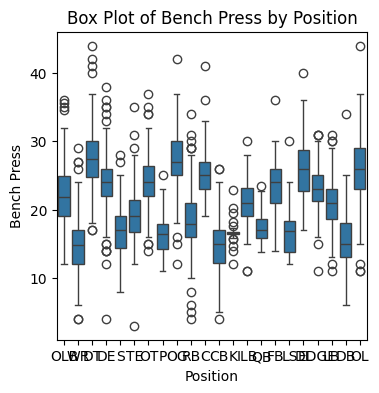

Number of outliers for Bench Press by Position: 94


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('path_to_your_data.csv')

# Define the list of metrics and categories
metrics = ['Height', 'Weight', '40 Yard Dash', 'Bench Press']
categories = ['Position']

# Create box plots for each metric grouped by each category
for metric in metrics:
    for category in categories:
        plt.figure(figsize=(4, 4))
        sns.boxplot(x=category, y=metric, data=data)
        plt.title(f'Box Plot of {metric} by {category}')
        plt.show()
         
        # Calculate Q1, Q3, and IQR
        grouped = data.groupby(category)[metric]
        Q1 = grouped.quantile(0.25)
        Q3 = grouped.quantile(0.75)
        IQR = Q3 - Q1

        # Define outliers based on the 1.5*IQR rule for each group
        def outliers(group):
            cat = group.name
            return group[(group < Q1[cat] - 1.5 * IQR[cat]) | (group > Q3[cat] + 1.5 * IQR[cat])]

        outlier_data = grouped.apply(outliers).dropna()
        if not outlier_data.empty:
            print(f"Number of outliers for {metric} by {category}: {len(outlier_data)}")
        else:
            print(f"No outliers found for {metric} by {category}.")


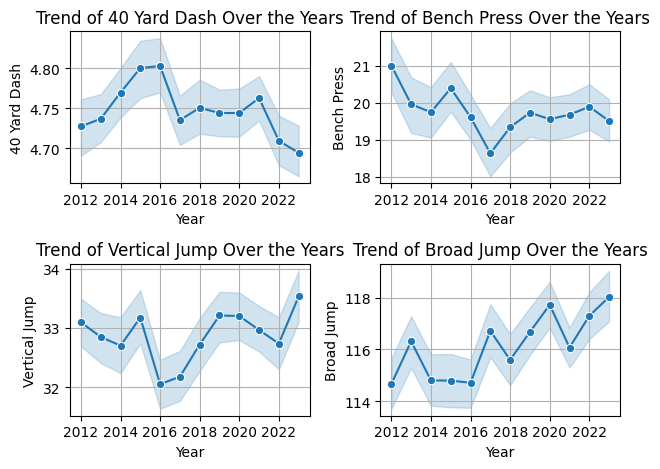

In [28]:
import matplotlib.ticker as ticker

metrics = ['40 Yard Dash', 'Bench Press', 'Vertical Jump', 'Broad Jump']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns, ith subplot
    sns.lineplot(x='Year', y=metric, data=data, marker='o')
    plt.title(f'Trend of {metric} Over the Years')
    plt.xlabel('Year')
    plt.ylabel(f'{metric}')
    plt.grid(True)
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    
plt.tight_layout()
plt.show()


The trends observed in the EDA output for the athletic performance metrics—'40 Yard Dash', 'Bench Press', 'Vertical Jump', and 'Broad Jump'—suggest variable changes in athlete performance over time, influenced possibly by shifts in training techniques, athlete selection criteria, or other external factors. Specifically, the '40 Yard Dash' performance peaks mid-period before declining, indicating a period of enhanced speed training or selection for speed that might have tapered off. In contrast, 'Bench Press' shows a significant decrease followed by a partial recovery, possibly reflecting changes in strength training priorities or methodologies. 'Vertical Jump' experiences a major dip and subsequent recovery to near-starting values, suggesting a temporary shift in focus or recovery from a decline in training effectiveness. The 'Broad Jump' records a notable increase, surpassing initial values, which could signify successful long-term enhancements in training regimes targeting explosive power and broad jumping capabilities. Each trend provides insights into the evolving focus and effectiveness of training programs specific to these metrics

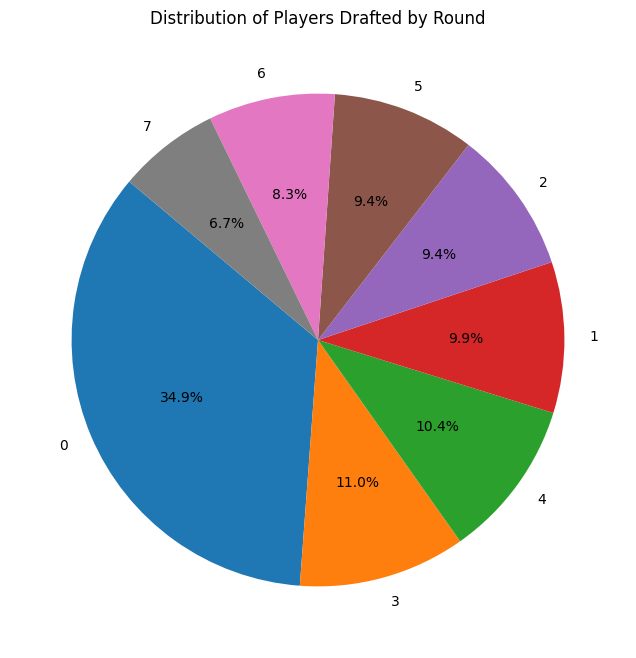

In [30]:
import matplotlib.pyplot as plt

# Calculate the distribution of players drafted in each round
round_counts = data['Round'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(round_counts, labels=round_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Players Drafted by Round')
plt.show()


This pie chart will provide a visual representation of the proportions of players drafted in each round, which can help understand the distribution dynamics in drafts. For instance, if there are significantly more players from later rounds, it might indicate that teams find value in the depth of the draft rather than focusing only on early picks. This could be useful for teams and analysts in assessing drafting strategies and the relative success of players from different rounds.

The distribution of players drafted by round, as represented by the pie chart percentages, reveals a somewhat surprising insight: a notably higher proportion of players, nearly 35%, are classified under "Round 0." This might suggest a category for undrafted players or special picks outside the traditional 1-7 rounds, which is significantly larger than any individual drafted round, where percentages range from 6.7% to 11%. The data shows a fairly even distribution among the conventional rounds (1 through 7), with each round accounting for approximately 9% to 11% of the players, except for Round 7, which has the lowest at 6.7%. This indicates that while there is a slight tapering off in the later rounds, teams maintain a relatively balanced approach to player selection across the draft, albeit with a significant emphasis on players that might not be selected within the standard round framework. This anomaly could point to the importance of considering non-traditional recruitment paths, such as signing undrafted free agents who may provide unexpected value.